# 사진 준비하기

In [1]:
# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(3088, 2316, 3)


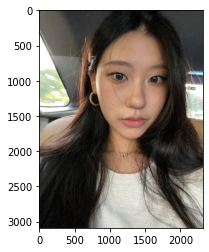

In [2]:
img_path = 'pic1.jpg'  
img_orig = cv2.imread(img_path) 
print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

# 세그멘테이션으로 사람 분리하기

In [3]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [4]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

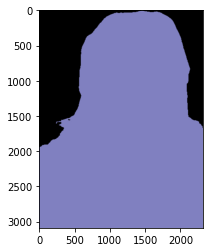

In [5]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [6]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [7]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [8]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [9]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(3088, 2316)


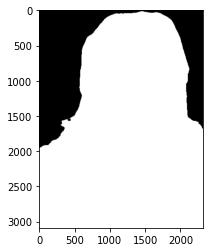

In [10]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

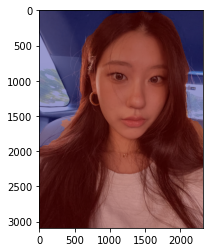

In [11]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 배경 흐리게 하기

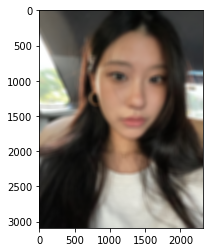

In [17]:
# (13,13)은 blurring kernel size를 뜻합니다. 다양하게 바꿔보며 적용
img_orig_blur = cv2.blur(img_orig, (60,60))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

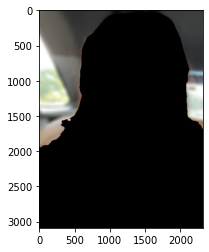

In [18]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

# 흐린 배경과 원본 영상 합성

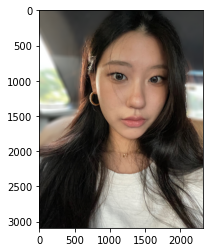

In [19]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 배경전환 크로마키 만들기

In [20]:
img_path = 'pic1.jpg'  
img_orig = cv2.imread(img_path)

In [21]:
# 사람이 검출된 마스크 불러오기 (이미 구해진 img_mask_color 사용)
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

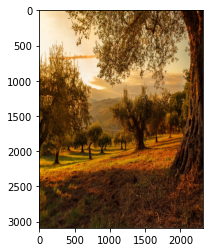

In [22]:
new_bg_path = 'background.jpg'
new_bg = cv2.imread(new_bg_path)

# 새로운 배경 이미지를 원본 이미지 크기로 리사이즈
new_bg_resized = cv2.resize(new_bg, (img_orig.shape[1], img_orig.shape[0]))

plt.imshow(cv2.cvtColor(new_bg_resized, cv2.COLOR_BGR2RGB))
plt.show()

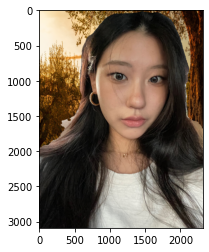

In [27]:
# 배경만 있는 이미지 만들기 (사람 부분을 없애고 배경만 남김)
img_bg_new = cv2.bitwise_and(new_bg_resized, img_bg_mask)
# 새로운 배경 이미지와 사람 부분을 결합
img_concat = np.where(img_mask_color == 255, img_orig, img_bg_new)

plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 사진에서 문제점 찾기

#배경 블러에선 티가 잘 안 났지만, 배경을 다른걸로 넣어보니 누끼가 제대로 안 따진 모습 
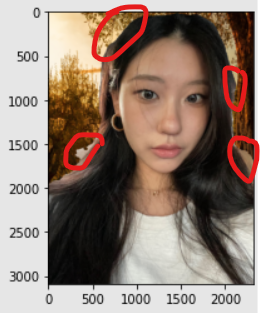

# ♥고양이♥ 사진으로 해보기

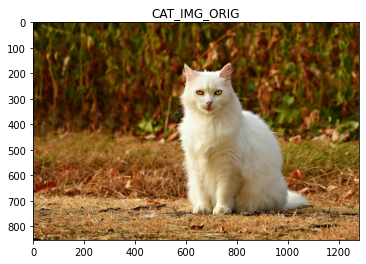

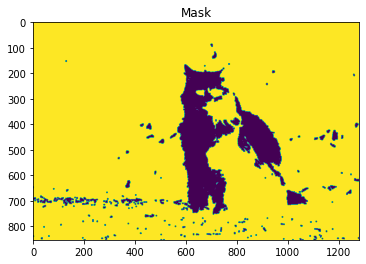

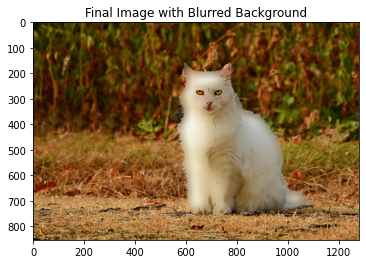

In [47]:
# 1. 고양이 마스크 제대로 안됨
def draw_img(image, title="Image"):
    plt.imshow(image)
    plt.title(title)
    plt.show()

CAT_IMG_PATH = 'cat.jpg'  
CAT_IMG_ORIG = cv2.imread(CAT_IMG_PATH)

if CAT_IMG_ORIG is None:
    print(f"이미지 {CAT_IMG_PATH}를 불러올 수 없습니다.")
else:
    # 이미지를 BGR에서 RGB로 변환한 후 출력
    draw_img(cv2.cvtColor(CAT_IMG_ORIG, cv2.COLOR_BGR2RGB), 'CAT_IMG_ORIG')

    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(CAT_IMG_ORIG, cv2.COLOR_BGR2GRAY)

    # 고양이를 추출하기 위해 이미지 이진화 (임계값 적용)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

    # 마스크 생성 (고양이 부분을 추출)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # 마스크 출력
    draw_img(mask, 'Mask')

    # 배경을 블러 처리
    blurred_background = cv2.blur(CAT_IMG_ORIG, (60, 60))

    # 마스크를 사용해 고양이 부분만 추출
    cat_only = cv2.bitwise_and(CAT_IMG_ORIG, CAT_IMG_ORIG, mask=mask)

    # 배경 부분만 추출하여 블러 처리된 배경에 적용
    mask_inv = cv2.bitwise_not(mask)
    background_only = cv2.bitwise_and(blurred_background, blurred_background, mask=mask_inv)

    # 블러 처리된 배경과 고양이 이미지를 합성
    final_img = cv2.add(cat_only, background_only)

    # 최종 결과 출력 (BGR에서 RGB로 변환)
    draw_img(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB), 'Final Image with Blurred Background')

In [58]:
# 2. 더 나은 성능을 위해...세그멘테이션을 기반으로 추출해보기
import os
import urllib.request
from pixellib.semantic import semantic_segmentation

# 모델 다운로드 경로 설정
model_dir = os.getenv('HOME', '.') + '/models'  # 모델 저장 디렉토리 설정
if not os.path.exists(model_dir):
    os.makedirs(model_dir)  # 디렉토리가 없으면 생성

model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib 모델 URL
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 모델이 존재하지 않는 경우 다운로드
if not os.path.exists(model_file):
    print(f"모델을 다운로드 중입니다: {model_url}")
    urllib.request.urlretrieve(model_url, model_file)
    print("모델 다운로드 완료")

# PixelLib로 세그멘테이션 모델 로드
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)  # 모델 파일 경로 지정

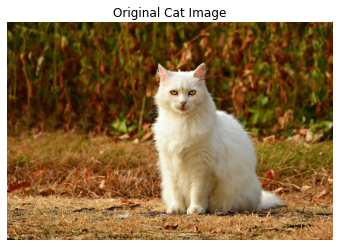

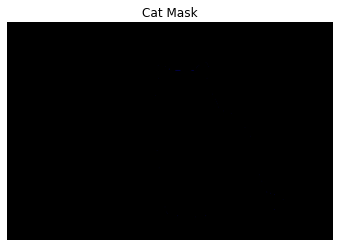

error: OpenCV(4.5.3) /tmp/pip-req-build-agffqapq/opencv/modules/core/src/arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'


In [59]:
# 고양이 이미지 경로
CAT_IMG_PATH = 'cat.jpg'  
CAT_IMG_ORIG = cv2.imread(CAT_IMG_PATH)

if CAT_IMG_ORIG is None:
    print(f"이미지 {CAT_IMG_PATH}를 불러올 수 없습니다.")
else:
    # 이미지를 BGR에서 RGB로 변환한 후 출력
    draw_img(cv2.cvtColor(CAT_IMG_ORIG, cv2.COLOR_BGR2RGB), 'Original Cat Image')

    # 세그멘테이션 수행
    segvalues, output = model.segmentAsPascalvoc(CAT_IMG_PATH)

    # PASCAL VOC에서 고양이 클래스 ID는 8번입니다.
    cat_class_id = 8
    seg_map = (output == cat_class_id)

    # 마스크 생성 (고양이 부분만 남기는 마스크)
    img_mask = seg_map.astype(np.uint8) * 255

    # 고양이 마스크 출력
    draw_img(img_mask, 'Cat Mask')

    # 배경을 블러 처리
    blurred_background = cv2.blur(CAT_IMG_ORIG, (60, 60))

    # 고양이 부분만 추출
    cat_only = cv2.bitwise_and(CAT_IMG_ORIG, CAT_IMG_ORIG, mask=img_mask)

    # 반전된 마스크를 사용해 배경 추출
    mask_inv = cv2.bitwise_not(img_mask)
    background_only = cv2.bitwise_and(blurred_background, blurred_background, mask=mask_inv)

    # 고양이와 블러 처리된 배경 합성
    final_img = cv2.add(cat_only, background_only)

    # 최종 결과 출력 (BGR에서 RGB로 변환)
    draw_img(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB), 'Final Image with Blurred Background')

# 회고

* 먼저 배경사진이랑 고양이 사진 등 저작권 없는 이미지를 고르느라 시간이 좀 오래 걸렸다. 웬만한 고양이 사진은 뒤가 블러처리가 되어있었음...
* 전체적으로 시간이 부족했던 것 같다. 루브릭 기준을 맞추려고 하다보니, 시간이 부족해 함수화 시키지 못하여 추가로 인물사진 블러처리를 못 해본 것이 아쉬웠음
* 기존 노드 코드를 가져와서 사용했는데, 뭘 해주어야 경계선을 더 자연스럽게 만들 수 있을지 더 고민해보고 싶음